In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("measurements.csv")

In [3]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [5]:
data.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [6]:
data.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [7]:
data["temp_inside"] = data["temp_inside"].fillna(0)

In [8]:
data.drop(["specials","refill liters","refill gas"],axis = 1,inplace = True)

In [9]:
data.corr()

,speed,temp_outside,AC,rain,sun
speed,1.000000,0.015411,-0.035408,0.009489,0.081618
temp_outside,0.015411,1.000000,0.167562,-0.186315,0.346903
AC,-0.035408,0.167562,1.000000,0.242915,0.088598
rain,0.009489,-0.186315,0.242915,1.000000,-0.112650
sun,0.081618,0.346903,0.088598,-0.112650,1.000000


In [10]:
data.shape

(388, 9)

In [11]:
data["speed"]

0      26
1      30
2      38
3      36
4      46
       ..
383    39
384    38
385    45
386    42
387    25
Name: speed, Length: 388, dtype: int64

In [12]:
data["temp_inside"].replace(",",".")   

0      21,5
1      21,5
2      21,5
3      21,5
4      21,5
       ... 
383    24,5
384      25
385      25
386      25
387      25
Name: temp_inside, Length: 388, dtype: object

In [13]:
dict1 = {"E10":0,"SP98":1}
data["gas_type"] = data["gas_type"].map(dict1)

In [14]:
def my_func(data,columns):
    my    = []
    for i in data[columns]: 
        i = str(i)
        if  "," in i:
            x = i.replace("," , ".")
            my.append(int(float(x))) 
        else:
            my.append(int(float(i)))       
    return my
        

In [15]:
data["distance"] = my_func(data,"distance")
data["consume"] = my_func(data,"consume")
data["temp_inside"] = my_func(data,"temp_inside")

In [16]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,21,12,0,0,0,0
1,12,4,30,21,13,0,0,0,0
2,11,5,38,21,15,0,0,0,0
3,12,3,36,21,14,0,0,0,0
4,18,4,46,21,15,0,0,0,0


In [17]:
data.describe()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.211340,4.476804,41.927835,20.984536,11.358247,0.587629,0.077320,0.123711,0.082474
std,22.662943,1.076878,13.598524,3.891257,6.991542,0.492897,0.267443,0.329677,0.275441
min,1.000000,3.000000,14.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,4.000000,32.750000,21.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,4.000000,40.500000,22.000000,10.000000,1.000000,0.000000,0.000000,0.000000
75%,19.000000,5.000000,50.000000,22.000000,16.000000,1.000000,0.000000,0.000000,0.000000
max,216.000000,12.000000,90.000000,25.000000,31.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   distance      388 non-null    int64
 1   consume       388 non-null    int64
 2   speed         388 non-null    int64
 3   temp_inside   388 non-null    int64
 4   temp_outside  388 non-null    int64
 5   gas_type      388 non-null    int64
 6   AC            388 non-null    int64
 7   rain          388 non-null    int64
 8   sun           388 non-null    int64
dtypes: int64(9)
memory usage: 27.4 KB


In [19]:
data.isnull().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

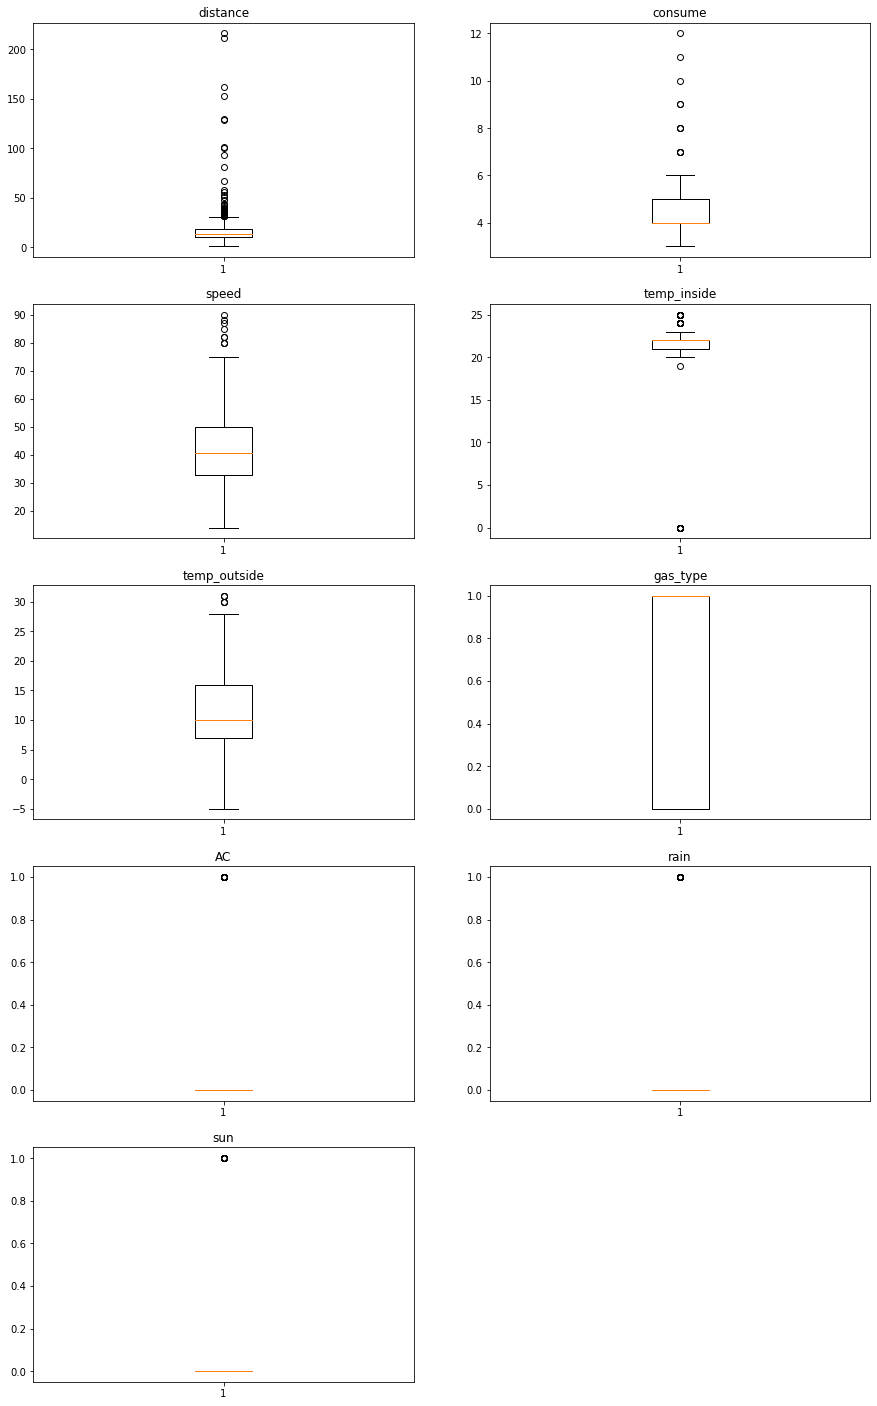

In [20]:
plt.figure(figsize = (15,25))
count = 1
for col in data.columns:
    plt.subplot(5,2,count)
    plt.boxplot(data[col])
    plt.title(col)
    count += 1

In [21]:
x = data.drop("distance",axis = 1).values

In [22]:
x

array([[ 5, 26, 21, ...,  0,  0,  0],
       [ 4, 30, 21, ...,  0,  0,  0],
       [ 5, 38, 21, ...,  0,  0,  0],
       ...,
       [ 3, 45, 25, ...,  0,  0,  0],
       [ 4, 42, 25, ...,  1,  0,  0],
       [ 5, 25, 25, ...,  1,  0,  0]], dtype=int64)

In [23]:
y = data.iloc[:,0].values

In [24]:
y

array([ 28,  12,  11,  12,  18,   8,   7,  12,   4,  11,  12,  11,  12,
        24,  12,  17,  33,  11,  25,  11,  25,  14,  17,  11,  12,  12,
        18,  18,  18,  18,  12,  11,  12,  32,  19,  12,  20,   4,  11,
        12,  12,   4,  11,  10,   5,   2,  14,  16,  11,  27,  11,  10,
        11,  13,   6, 153,  11,  12,  12,  12,   2,   2,   9,   6,  12,
        12,  11,  12,  14,  11,  12,   2,  13,   9,  11,  14,  11,  24,
        12,  34,  14,   5,  10,  12,  11,  12,  13,  13,  12,  13,  11,
        12,  12,  12,  11,  11,  12,  15,  12,   6,   5,  26,  18,   4,
        12,  22, 162,   4,  11,  16,  12,  15,   5,  22,  31,   4,  11,
        22,  12,  12,  11,  12,  24,  14,  11,  12,  24,   6,  17,  11,
        15,   5,  16,  11,   4,  17,  23,  11,  12,  16,  11,  12,  12,
         7,  11,  20,  20,   1,  35,  36,  16,   9,  22,  17,  11,  36,
        44,  11,  21,  39,   5,  26,  53,  18,  43,   6,  16,  12,  21,
        21,  22,  44,  35,  11,  26,  40,  12,  14,  58,  16,  1

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

# Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
model.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred = model.predict(x_test)

In [30]:
model.score(x_train,y_train)

0.3455063760207032

In [31]:
model.score(x_test,y_test)

0.24856025107671942

In [42]:
r2_score(y_test,y_pred)

0.24856025107671942

# Using Lasso Regression

In [32]:
from sklearn.linear_model import Lasso

In [33]:
model1 = Lasso(alpha = 50)

In [34]:
model1.fit(x_train,y_train)

Lasso(alpha=50)

In [35]:
model1.score(x_train,y_train)

0.26989195925600007

In [36]:
model1.score(x_test,y_test)

0.2263956492910405

# Forward selection method

In [37]:
import statsmodels.api as sm

In [38]:
ols = sm.OLS(endog=y,exog=x).fit()

In [39]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.595
Model:                            OLS   Adj. R-squared (uncentered):              0.587
Method:                 Least Squares   F-statistic:                              69.83
Date:                Fri, 19 Mar 2021   Prob (F-statistic):                    6.08e-70
Time:                        22:53:01   Log-Likelihood:                         -1690.7
No. Observations:                 388   AIC:                                      3397.
Df Residuals:                     380   BIC:                                      3429.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.9764      0.765     -2.583      0.010      -3.481      -0.472
x2             0.8078      0.064     12.548      0.000       0.681       0.934
x3            -0.2786      0.204     -1.364      0.173      -0.680       0.123
x4             0.1073      0.153      0.700      0.485      -0.194       0.409
x5            -1.5425      1.985     -0.777      0.438      -5.445       2.360
x6            -0.0462      3.856     -0.012      0.990      -7.628       7.536
x7             0.2128      3.187      0.067      0.947      -6.053       6.478
x8             1.0855      3.784      0.287      0.774      -6.355       8.526
==============================================================================
Omnibus:                      411.379   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18057.508
Skew:                           4.688   Prob(JB):                         0.00
Kurtosis:                      35.079   Cond. No.                         212.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
def forward_selection(data,response):
    remaining = set(data.columns)
    remaining.remove('distance')
    selected = []
    current_score,best_score = 0.0,0.0
    while remaining and current_score == best_score:
        score_with_candidates = []
        for candidate in remaining:
            x = data[selected + [candidate]].values
            y  = data[response].values
            ols = sm.OLS(endog=y,exog=x).fit()
            score = ols.rsquared_adj
            score_with_candidates.append((score,candidate))
        score_with_candidates.sort()
        best_score,best_candidate = score_with_candidates.pop()
        if current_score < best_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_score
            print(selected)
            print(current_score)

In [41]:
forward_selection(data,'distance')

['speed']
0.5580298093662679
['speed', 'consume']
0.5901467575108523
['speed', 'consume', 'temp_inside']
0.5907501021064141
